<a href="https://colab.research.google.com/github/hoangson10/code/blob/main/nhan_dien_hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [51]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [52]:
import os
train_image_files_path = '/content/drive/MyDrive/codeAI/nhan_dien_hoa/data/train'
valid_image_files_path = '/content/drive/MyDrive/codeAI/nhan_dien_hoa/data/validation'

In [53]:
label = ['bimbim','hoasu','rose']

In [54]:
#xu li anh
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255)
validation_datagen=ImageDataGenerator(rescale=1/255)

In [55]:
train_generator = train_datagen.flow_from_directory(train_image_files_path,target_size=(200,200),class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(valid_image_files_path,target_size=(200,200),class_mode='categorical')

Found 315 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


In [59]:
x_train,y_train=next(train_generator)

In [61]:
x_train.shape

(32, 200, 200, 3)

In [62]:
y_train.shape

(32, 3)

In [64]:
x_train=x_train.reshape(32,120000)
x_train=x_train.astype ('float32')
x_train=x_train/255
x_train.shape

(32, 120000)

In [65]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(512,activation = 'relu',input_shape = (120000,)))
model.add(layers.Dense(3,activation = 'softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               61440512  
                                                                 
 dense_10 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 61,442,051
Trainable params: 61,442,051
Non-trainable params: 0
_________________________________________________________________


In [57]:
#x_train,y_train=next(train_generator)

In [68]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])

In [69]:
model.fit(x_train, y_train, epochs = 200, batch_size = 128)

Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 1.2117 - accuracy: 0.4062
Epoch 2/200
1/1 [==============================] - 1s 720ms/step - loss: 749.0795 - accuracy: 0.3125
Epoch 3/200
1/1 [==============================] - 1s 532ms/step - loss: 851.1572 - accuracy: 0.2812
Epoch 4/200
1/1 [==============================] - 1s 719ms/step - loss: 143.4849 - accuracy: 0.5312
Epoch 5/200
1/1 [==============================] - 1s 522ms/step - loss: 141.1561 - accuracy: 0.2812
Epoch 6/200
1/1 [==============================] - 1s 536ms/step - loss: 87.4939 - accuracy: 0.6562
Epoch 7/200
1/1 [==============================] - 1s 529ms/step - loss: 69.4658 - accuracy: 0.3125
Epoch 8/200
1/1 [==============================] - 1s 535ms/step - loss: 144.6345 - accuracy: 0.4375
Epoch 9/200
1/1 [==============================] - 1s 515ms/step - loss: 108.5143 - accuracy: 0.3750
Epoch 10/200
1/1 [==============================] - 1s 534ms/step - loss: 81.4691 - accuracy: 0.40

In [71]:
#from keras.models import load_model
#model100 = load_model('cifar.h5')
model.save('nhan_dien_hoa.h5')

1/1 [==============================] - 0s 51ms/step
[[2.4013343e-06 9.9999762e-01 2.2066602e-12]]
1/1 [==============================] - 0s 42ms/step
Đây là: hoasu


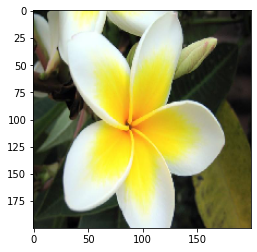

In [74]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
img = load_img('/content/drive/MyDrive/codeAI/nhan_dien_hoa/data/test/hoasu/image_00936.jpg',target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.astype('float32')
img= img.reshape(1,200*200*3)
img = img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là:", label[a])

1/1 [==============================] - 0s 45ms/step
[[6.020779e-13 9.194243e-24 1.000000e+00]]
1/1 [==============================] - 0s 57ms/step
Đây là: rose


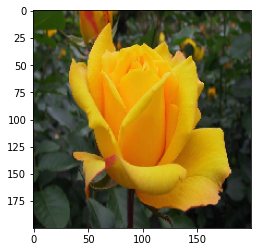

In [76]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
img = load_img('/content/drive/MyDrive/codeAI/nhan_dien_hoa/data/test/rose/image_01296.jpg',target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.astype('float32')
img= img.reshape(1,200*200*3)
img = img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là:", label[a])

1/1 [==============================] - 0s 44ms/step
[[1.0000000e+00 2.9922553e-15 6.1432609e-33]]
1/1 [==============================] - 0s 44ms/step
Đây là: bimbim


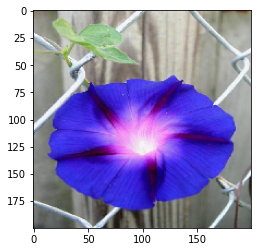

In [80]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
img = load_img('/content/drive/MyDrive/codeAI/nhan_dien_hoa/data/test/bimbim/image_02495.jpg',target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.astype('float32')
img= img.reshape(1,200*200*3)
img = img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là:", label[a])